# Assignment-1: Maze Solver using BFS and DFS 
Objective: Implement BFS and DFS to solve a maze. 
Problem Statement: Given a grid-based maze where 0 represents walls and 1 
represents walkable paths, find the shortest path from a start cell to an end cell. 
Tasks: 
⚫ Use BFS to find the shortest path. 
⚫ Use DFS to explore all possible paths and report one valid path (not necessarily 
the shortest). 
⚫ Compare the number of nodes explored by BFS and DFS.

BFS Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
DFS Path: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


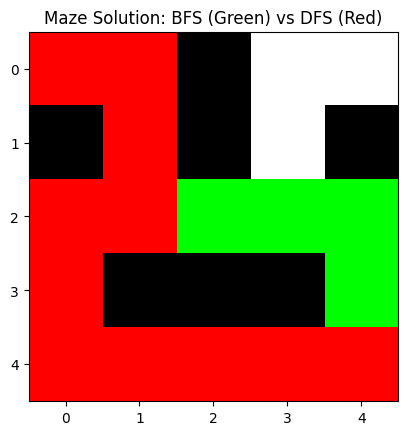

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def bfs(maze, start, end):
    rows, cols = maze.shape
    queue = deque([(start, [start])])
    visited = set()
    
    while queue:
        (x, y), path = queue.popleft()
        
        if (x, y) == end:
            return path
        
        visited.add((x, y))
        
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx, ny] == 1 and (nx, ny) not in visited:
                queue.append(((nx, ny), path + [(nx, ny)]))
    
    return None

def dfs(maze, start, end, path=None, visited=None):
    if path is None:
        path = [start]
    if visited is None:
        visited = set()
    
    if start == end:
        return path
    
    visited.add(start)
    x, y = start
    
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < maze.shape[0] and 0 <= ny < maze.shape[1] and maze[nx, ny] == 1 and (nx, ny) not in visited:
            new_path = dfs(maze, (nx, ny), end, path + [(nx, ny)], visited)
            if new_path:
                return new_path
    
    return None

def visualize_maze(maze, path_bfs, path_dfs):
    img = np.ones((*maze.shape, 3), dtype=np.uint8) * 255 #white
    img[maze == 0] = (0, 0, 0) #black
    
    for x, y in path_bfs:
        img[x, y] = (0, 255, 0)
    
    for x, y in path_dfs:
        img[x, y] = (255, 0, 0)
    
    plt.imshow(img)
    plt.title("Maze Solution: BFS (Green) vs DFS (Red)")
    plt.show()

if __name__ == "__main__":
    maze = np.array([
        [1, 1, 0, 1, 1],
        [0, 1, 0, 1, 0],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 0, 1],
        [1, 1, 1, 1, 1]
    ])
    
    start, end = (0, 0), (4, 4)
    path_bfs = bfs(maze, start, end)
    path_dfs = dfs(maze, start, end)
    
    print(f"BFS Path: {path_bfs}") #green 
    print(f"DFS Path: {path_dfs}") #red
    
    visualize_maze(maze, path_bfs, path_dfs)
